# Read Me
このノートブックでは回帰問題と分類問題の評価指標の理解と実装を行います

# 回帰問題の評価指標

In [180]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## RMSE (Root Mean Squared Error)
### 評価指標の導出方法
モデルから計算した計算値（予測値）を $\hat{y_i}$ とすると、RMSEは次の式によって定義される。  
<br>
<span style="font-size: 150%">$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^2}$</span>
<br>

- 別名: 二乗平均平方根誤差

### 評価指標の特性、どのようなときに使えるか使えないか

- 平均化された誤差の値を示す。
- 式の性質上、観測値と計算値（予測値）が近づくほど、RMSEは小さくなる。逆に、観測値と計算値（予測値）が遠くなると、RMSEが著しく増える。
- 外れ値の少ないデータでは良い評価指標になる。
- 外れ値に大きく依存するので、外れ値を重要視したいときに有効。
- 大きな誤差を考慮したいときに使う

### 簡単なデータで実装

本当の値が3, 5, 8であるような数値を、それぞれ2, 4, 10と予測してしまった。このときのRMSEを求める

<span style="font-size: 150%">\begin{align}RMSE &= \sqrt{\frac{1}{3} \{(3 - 2)^2 + (5 - 4)^2  + (10 - 8)^2\}}\\ &= 1.414...\end{align}</span>

### sklearnのbostonを利用して実装

データの準備

In [182]:
from sklearn.datasets import load_boston

boston = load_boston()

bostonの平均部屋数を行列X, 住宅価格をベクトルyに格納

In [183]:
X = boston.data[:, 5]
y = boston.target
y.shape, X.shape, boston.data.shape

((506,), (506,), (506, 13))

トレーニング用とテスト用のデータに分け、図示

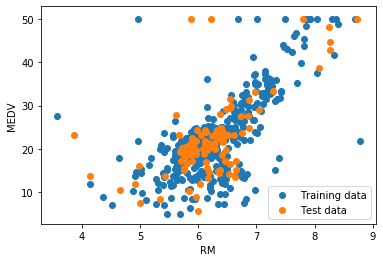

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

plt.xlabel('RM')
plt.ylabel('MEDV')

plt.legend()

y = ax + bの未知変数a, bを学習して決定

In [196]:
linear_regression = LinearRegression()

# 学習 ( = 未知のパラメータの最適化 )
linear_regression.fit(X_train.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
from sklearn.metrics import mean_squared_error
a = linear_regression.coef_[0]
b = linear_regression.intercept_

df_test = pd.DataFrame()
df_test['RM'] = X_test
df_test['MEDV'] = y_test
df_test = df_test[['RM', 'MEDV']]
df_test.head()
y_pred = []
for i in X_test:
    y_pred.append(a*i+b)

print(f'今回のRSMEは{(mean_squared_error(y_test, y_pred))**0.5}です')

今回のRSMEは6.848894190115315です


## MAE (Mean Absolute Error)
### 評価指標の導出方法
モデルから計算した計算値（予測値）を $\hat{y_i}$ とすると、MAEは次の式によって定義される。  
<br>
<span style="font-size: 150%">${\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y_{i}}|}$</span>
<br>


### 評価指標の特性、どのようなときに使えるか使えないか

- RMSEと同様、平均化された誤差の値を示す。
- RMSEと同様、観測値と計算値（予測値）が近づくほど、MAEは小さくなる。逆に、観測値と計算値（予測値）が遠くなると、MAEが増える。
- RMSEに比べ、外れ値のデータには影響しづらい。
- 大きな誤差をそれほど考慮しないで誤差を示したいときに使う。

### 簡単なデータで実装

本当の値が3, 5, 8であるような数値を、それぞれ2, 4, 10と予測してしまった。このときのMAEを求める

<span style="font-size: 150%">\begin{align}MAE &= \frac{1}{3} \{|3 - 2| + |5 - 4| + |10 - 8|\}\\ &= 1.333...\end{align}</span>

### sklearnのbostonを利用して実装

In [198]:
from sklearn.metrics import mean_absolute_error
print(f'今回のMAEは{mean_absolute_error(y_test, y_pred)}です')

今回のMAEは4.324740740011389です


## R2 Score

### 評価指標の導出方法
モデルから計算した計算値（予測値）を $\hat{y_i}$ , 観測値の平均を$\bar{y_i}$とすると、R2 Scoreは次の式によって定義される。  
<br>
<span style="font-size: 150%">$1 -  \frac{\sum^{n}_{i=1} (y_{i} - \hat{y_{i}})^2}{\sum^{n}_{i=1} (y_{i} - \bar{y_{i}})^2}$</span>
<br>


### 評価指標の特性、どのようなときに使えるか使えないか

- R2 Scoreは $\hat{y_i}$ と $\bar{y_i}$ が完全に一致する場合に 1 となり、1 に近いほど精度の高い予測が行えていることを表す。
- 上記2つは誤差の指標だが、R2 Scoreは回帰モデルの正確さを示す指標。
- モデルによって予測した値が実際の値とどの程度一致しているかを知りたいときに使う。

### 簡単なデータで実装

本当の値が3, 5, 7であるような数値を、それぞれ2, 4, 10と予測してしまった。このときのR2 Scoreを求める

<span style="font-size: 150%">$\begin{align}R2 Score &= 1 -  \frac{(3 - 2)^2 + (5 - 4)^2 + (10 - 7)^2}{(3 - 5)^2 + (5 - 5)^2 + (7 - 5)^2}\\ &= -0.375\end{align}$</span>

### sklearnのbostonを利用して実装

In [199]:
from sklearn.metrics import r2_score
print(f'今回のR2 Scoreは{r2_score(y_test, y_pred)}です')

今回のR2 Scoreは0.42394386816456275です


# クラス分類の評価指標

## 混同行列(Confusion Matrix)
### 評価指標の導出方法
2値分類問題において、
- ターゲットをターゲットとして分類できたものをTP
- ターゲットでないものをターゲットでないと分類できたものをTF
- ターゲットをターゲットでないと分類したものをFN
- ターゲットでないものをターゲットと分類したものをFP

と呼ぶ。これを表に表すと  
![](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/70152/29cc37e7-ff2e-d781-d4a4-e328fd7526a1.png)

となる。これを行列で表すと、2行2列の行列になり、各要素に対応した判別個数が格納される

### 評価指標の特性、どのようなときに使えるか使えないか

- 4つの値を行列に格納することによって、演算しやすい、見やすい形となる。

### 簡単なデータで実装

猫を判別する2値分類問題を考えたときに  
- TP: 13
- TN: 8
- FP: 9
- FN: 3

という結果だった場合、混同行列は  

<span style="font-size: 150%">$Confusion Matrix = \biggl(\begin{matrix}13&8\\9&3\end{matrix}\biggr)$</span>

となる

### sklearnのbreat_cancer を利用して実装

データ準備

In [200]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

腫瘍データを行列X2, 診断データをベクトルy2, さらににX, yをデータフレームdf2に格納

In [201]:
X2 = cancer.data
y2 = cancer.target
y2 = np.array(y2)
df2= pd.DataFrame(X2, columns=cancer.feature_names)
df2['judge'] = y2

numpy.ndarray

トレーニング用とテスト用に分割

In [202]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df2.drop(columns=['judge']), df2['judge'], train_size=0.7, random_state=0)

機械に学習させる

In [203]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(C=1.0)

logistic_regression.fit(X2_train, y2_train)
print(type(y2_train))
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)
print(f'Train Acc: {logistic_regression.score(X2_train, y2_train):.3f}')
print(f'Test Acc: {logistic_regression.score(X2_test, y2_test):.3f}')

<class 'pandas.core.series.Series'>
Train Acc: 0.957
Test Acc: 0.965


In [204]:
from sklearn.metrics import confusion_matrix
y2_pred = logistic_regression.predict(X2_test)
print(f'混同行列は')
print(confusion_matrix(y2_test, y2_pred))
print('です。')

混同行列は
[[ 62   1]
 [  5 103]]
です。


## 正答率(Accuracy)
### 評価指標の導出方法
単純な正答率なので、全体から見た正解数の割合になる。
![](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F70152%2F89823105-feb7-0208-2815-4acf894786f2.png?ixlib=rb-1.2.2&auto=compress%2Cformat&gif-q=60&w=1400&fit=max&s=eb62c2ac69c2e148d55a162e07f28a26)

### 評価指標の特性、どのようなときに使えるか使えないか

- 分類予測がどれほどあっているかの指標、高いほど性能が高い。
- 文字通り、正答率を見たいときに使える

### 簡単なデータで実装

猫を判別する2値分類問題を考えたときに  
- TP: 13
- TN: 8
- FP: 9
- FN: 3

という結果だった場合、正答率は  

<span style="font-size: 150%">$\begin{align} Accuracy &= \frac{13 + 8}{13 + 8 + 9 + 3}\\ &= 0.636...\end{align}$</span>

となる

### sklearnのbreat_cancer を利用して実装

In [205]:
from sklearn.metrics import accuracy_score
print(f'今回の正答率は{accuracy_score(y2_test, y2_pred)}です。')

今回の正答率は0.9649122807017544です。


## 適合率(Precision)
### 評価指標の導出方法

positiveと分類されたデータ(TP + FP)の中で実際にPositiveだったデータ(TP)数の割合。  

![](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F70152%2F6d5a3aa8-29fb-a98f-4454-76509043133e.png?ixlib=rb-1.2.2&auto=compress%2Cformat&gif-q=60&w=1400&fit=max&s=30049a79568be07786d22eac0d2e29f9)

### 評価指標の特性、どのようなときに使えるか使えないか

- 適合率が高いほど性能が良く、間違った分類が少ないということを意味する。


### 簡単なデータで実装

猫を判別する2値分類問題を考えたときに  
- TP: 13
- TN: 8
- FP: 9
- FN: 3

という結果だった場合、適合率は  

<span style="font-size: 150%">$\begin{align} Precision &= \frac{13}{13 + 9}\\ &= 0.591...\end{align}$</span>

となる

### sklearnのbreat_cancer を利用して実装

In [206]:
from sklearn.metrics import precision_score
print(f'今回の適合率は{precision_score(y2_test, y2_pred)}です。')

今回の適合率は0.9903846153846154です。


## 再現率(Recall)
### 評価指標の導出方法

取りこぼし無くPositiveなデータを正しくPositiveと推測できているかどうか。

![](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F70152%2F2512b39c-5722-01a8-180d-44a2da38f25b.png?ixlib=rb-1.2.2&auto=compress%2Cformat&gif-q=60&w=1400&fit=max&s=d4cc727530445fec5aab764b751c7002)

### 評価指標の特性、どのようなときに使えるか使えないか

- 再現率が高いほど性能がよく、本来Positiveと推測すべき全データの内、どれほど回収できたかという指標。


### 簡単なデータで実装

猫を判別する2値分類問題を考えたときに  
- TP: 13
- TN: 8
- FP: 9
- FN: 3

という結果だった場合、適合率は  

<span style="font-size: 150%">$\begin{align} Recall &= \frac{13}{13 + 3}\\ &= 0.813...\end{align}$</span>

となる

### sklearnのbreat_cancer を利用して実装

In [207]:
from sklearn.metrics import recall_score
print(f'今回の再現率は{recall_score(y2_test, y2_pred)}です。')

今回の再現率は0.9537037037037037です。


## 交差エントロピー誤差(Cross Entropy Loss; LogLoss)
### 評価指標の導出方法

$$
E = - \sum_{k=1}^n t_k \log z_k = - (t_1 \log z_1 + t_2 \log z_2 + t_3 \log z_3 + ... + t_n \log z_n)
$$



### 評価指標の特性、どのようなときに使えるか使えないか

- 交差エントロピー誤差は、pとqが近似すると数値が小さくなり、pとqが近似しなくなると数値が大きくなる。
- 予測の正答率が高いと交差エントロピー誤差は小さくなる。


### 簡単なデータで実装

もも。りんご、ぶどうの3つの果物を予測するを解く際に、正解データが  

<br>

$\begin{pmatrix}t_{1}\\t_{2}\\t_{3}\end{pmatrix} = \begin{pmatrix}もも\\りんご\\ぶどう\end{pmatrix} = \begin{pmatrix}0\\1\\0\end{pmatrix}$

<br>

であり、  予測する確率ベクトルが  
<br>
$\begin{pmatrix}z_{1}\\z_{2}\\z_{3}\end{pmatrix} = \begin{pmatrix}もも\\りんご\\ぶどう\end{pmatrix} = \begin{pmatrix}0.5\\0.2\\0.3\end{pmatrix}$

<br>

だったときの交差エントロピー誤差 ( 今回の対数の底は10 )は  

<span style="font-size: 150%">$\begin{align}E &= -(t_{1}\log z_{1} + t_{2}\log z_{2} + t_{3}\log z_{3})\\ &= -(0 \times \log 0.5 + 1 \times \log 0.2 + 0 \times \log 0.3)\\ &= -(0 \times (-0.30) + 1 \times (-0.70) + 0 \times (-0.52))\\ &= -(-0.70)\\ &= 0.70\end{align}$</span>

となる

### sklearnのbreat_cancer を利用して実装

In [208]:
import math
E = 0

for i in range(len(y2_test)):
    if y2_test[i] == 0:
        E += -math.log(logistic_regression.predict_proba(X2_test)[i][0])
    else:
        E += -math.log(logistic_regression.predict_proba(X2_test)[i][1])

E /= len(y2_test)
# print(logistic_regression.predict_proba(X2_test))
print(f'この交差エントロピー誤差は{E}です。')

この交差エントロピー誤差は0.09928412540597382です。


おわり